In [1]:
import sys
sys.path.append("../../")
print(sys.path)

from attack import *
FLAGS.input_dir = "../../../official_data/dev_data/"
FLAGS.output_dir = "../../../test_data/TargetAttackResult/"
FLAGS.weight_path = "../../IJCAI19/weight/"
FLAGS.batch_size = 4

from IJCAI19.model.EmbeddedAttackModel import PredictBatch
OfficialModel.WEIGHT_DIR = FLAGS.weight_path

['C:\\ProgramData\\Miniconda3\\python36.zip', 'C:\\ProgramData\\Miniconda3\\DLLs', 'C:\\ProgramData\\Miniconda3\\lib', 'C:\\ProgramData\\Miniconda3', '', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ywilliam\\.ipython', '../../']


Using TensorFlow backend.


In [11]:
TARGET_ATTACK = True

M = GradSmoothMomentumIterativeMethod
# from cleverhans.attacks import FastGradientMethod
# M = FastGradientMethod
#non targeted with guessed label
attack_params = {"ep_ratio": 0.1, "nb_iter": 10, "target":TARGET_ATTACK}
attack(M, attack_params, targetlabel=TARGET_ATTACK)

{'ep_ratio': 0.1, 'nb_iter': 10, 'target': True, 'eps': 25.5, 'eps_iter': 2.55, 'y_target': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'clip_min': 0, 'clip_max': 255}
INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/resnet_v1_50/model.ckpt-49800


In [24]:
#self predict
batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
open(FLAGS.output_dir+'dev.csv', "wb").write(open(FLAGS.input_dir+'dev.csv', "rb").read())
img_loader = ImageLoader(FLAGS.output_dir, batch_shape, targetlabel=TARGET_ATTACK, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
name = 'inception_v1'
T = AttackModel(batch_shape, FLAGS.num_classes, name=name)
Yp, topK, acc = PredictBatch(T, img_loader)

INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/inception_v1/inception_v1.ckpt
Predict  runs: 4.39 s
batchs 28 Accuracy 1.0


In [3]:
#Validation
#copy dev.csv
batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
open(FLAGS.output_dir+'dev.csv', "wb").write(open(FLAGS.input_dir+'dev.csv', "rb").read())
img_loader = ImageLoader(FLAGS.output_dir, batch_shape, targetlabel=TARGET_ATTACK, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
name = 'vgg_16'
T3 = AttackModel(batch_shape, FLAGS.num_classes, name=name)
Yp, topK, acc = PredictBatch(T3, img_loader)

INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/vgg_16/vgg_16.ckpt
Predict  runs: 19.51 s
batchs 28 Accuracy 0.02727272727272727


In [25]:
#calc
all_shape = (110, batch_shape[1], batch_shape[2], batch_shape[3])
img_loader = ImageLoader(FLAGS.input_dir, all_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
_, X, Y = next(img_loader)
img_loader = ImageLoader(FLAGS.output_dir, all_shape, targetlabel=TARGET_ATTACK, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
_, Xadv, Yadv = next(img_loader)

print(X.shape, Xadv.shape, Y.shape, Yadv.shape)
print(" mean L2:", calc_l2(X, Xadv))
print("Score and succ:", calc_score(X, Xadv, Yadv.argmax(1), Yp, target=TARGET_ATTACK))

(110, 299, 299, 3) (110, 299, 299, 3) (110, 110) (110, 110)
 mean L2: 17.54300689862218
Score and succ: (17.54300689862218, 1.0)


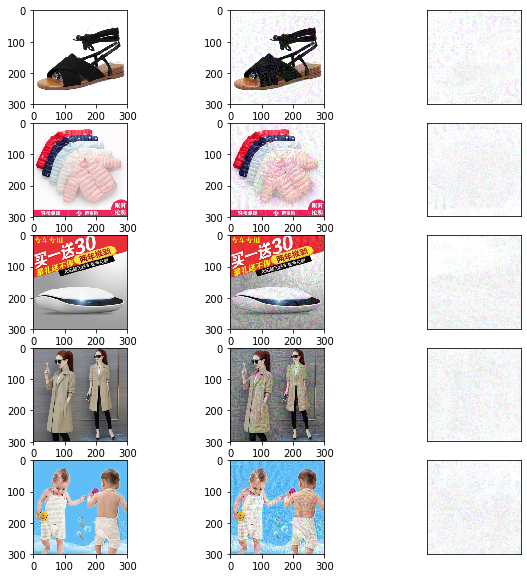

In [26]:
plot_images(X, Xadv)

In [6]:
# test_dir = "C:\\users\\ywilliam\\docker\\out_data\\"
# batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
# img_loader = ImageLoader(test_dir, batch_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# T3 = AttackModel(batch_shape, FLAGS.num_classes, name=name)
# Yp, topK, acc = PredictBatch(T3, img_loader)

# #calc
# all_shape = (110, batch_shape[1], batch_shape[2], batch_shape[3])
# img_loader = ImageLoader(FLAGS.input_dir, all_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# _, X, Y = next(img_loader)
# img_loader = ImageLoader(test_dir, all_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# _, Xadv, Yadv = next(img_loader)

# print(X.shape, Xadv.shape, Y.shape, Yadv.shape)
# print(" mean L2:", calc_l2(X, Xadv))
# print("Score:", calc_score(X, Xadv, Y.argmax(1), Yp))

In [15]:
Y.argmax(1)

array([ 17,  13,  66,  10,  57,  35,  47, 107,  27,  31,  15,  40,   5,
        78,  52,  37,  21,  58,  55,  50,  88, 101, 102, 105,  75,   7,
         8,  18,  84,  48,   2,  54,   4,  62,  46,  28,  24, 100,  16,
        14,  34,  82,  70,   1,  32, 109,  72,  51,  33,  69,  59,   0,
        26,  41,  92,   9,  89,  67,  83,  61,   6,  81,  97,  95,  11,
        85,  30,  45, 103,  39,  71,  96,  93, 106,  90,  77,  98,  94,
         3,  99,  12,  73,  74,  22,  60,  43,  53,  87,  36,  64,  42,
        65, 108,  38,  49,  79,  44,  29,  68,  23,  56,  76, 104,  91,
        25,  20,  63,  80,  19,  86], dtype=int64)

In [22]:
Yadv.argmax(1)

array([ 64,  65, 109,  43,  88,  94,  46,  86,  66,  49,  13,  72, 100,
        92,  57,  56,  45,  63,   9,  76,   5,  22,  27,  90,  54,  97,
        30,  69,  50,   2,  31,  16,  32,  62,  19,  10,   8,  36,  18,
        52,  85,  77,  41,  78,  83,  89, 101,   6,  39,   7,  68,  40,
        29,  51,  80,   4,  96,  93,   1, 108,   3,  24,  35,  12,  61,
        82,  28,  60,  33,   0,  95,  73, 105,  14,  67,  55,  99, 107,
        74,  37,  59,  17,  71,  84,  91, 102,  11,  48,  53,  20, 104,
       103,  21,  15,  44,  75,  26,  81, 106,  87,  42,  47,  38,  70,
        23,  25,  98,  58,  34,  79], dtype=int64)

In [23]:
Yp

array([ 60, 107,  70,  45, 102,  70,  87,  86,  26,  31,  15,   1,   5,
        78,  52,  70,  21,  58, 108,  49,  40, 101, 102, 105,  75, 102,
         8,  69,  84, 107,  90,  54,   4,  62, 101,  28,  24, 100,  88,
        85, 108,   5,  70,   1,  32,  49,  70,  51,  86,  69,  59,  56,
        26,   0,  70,  40, 100,  38,  83,  61,  68,  89,  97, 105,  40,
        43,  70,   5, 103, 105,  26,  59,  93,   8,  56, 102,  98, 107,
         3,  99,  86,  73,  74,  22,  92, 103,  99,  87,  36,  64,  42,
       103,  68,  38,  49, 100,  62,  70,  68,  56,  56,  76, 104,  57,
       107,  45,  63,  80,  75,  75], dtype=int64)